In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import os

In [ ]:
def Kmeans_with_plot(data,n_clusters):
    clf = KMeans(n_clusters=n_clusters)
    clf.fit(data)  
    centers = clf.cluster_centers_ 
    labels = clf.labels_  
    colors=['red','orange','yellow','green','blue','purple']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])
    plt.scatter(centers[:,0],centers[:,1],marker='*', s=100)
    
def Hierarchical_with_plot(data,n_clusters):
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='single').fit(data)
    labels = ward.labels_
    colors=['red','orange','yellow','green','blue','purple']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])
        
def DBSCAN_with_plot(data,eps,min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    colors=['red','orange','yellow','green','blue','purple','black']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])

Text(0.5, 0.98, 'View Data')

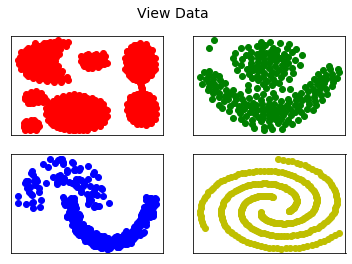

In [90]:
root=r'C:\Users\sujun\Desktop\STAT 6240\Homework2\Clustering-dataset'
df=[]
for file in os.listdir(root):
    df.append(pd.read_table(root+os.sep+file))
for i,color in enumerate("rgby"):
    plt.subplot(221+i)
    plt.scatter(df[i]['Column1'].values,df[i]['Column2'].values,color=color) 
    plt.xticks([]),plt.yticks([])
plt.suptitle('View Data', fontsize=14)

Text(0.5, 0.98, 'K-means clustering')

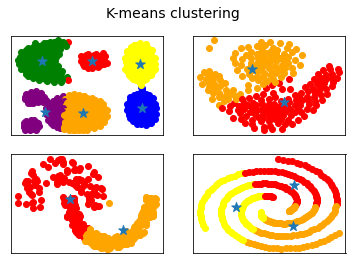

In [130]:
n_clusters=[6,2,2,3]
plt.title('K-means clustering')
for i in range(4):
    plt.subplot(221+i)
    Kmeans_with_plot(df[i].iloc[:,:2].values,n_clusters[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering', fontsize=14)

Text(0.5, 0.98, 'Hierarchical clustering')

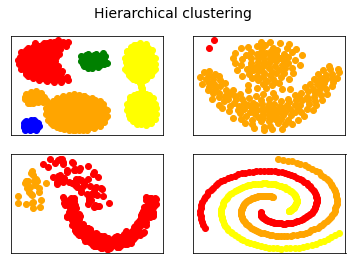

In [134]:
n_clusters=[5,2,2,3]
for i in range(4):
    plt.subplot(221+i)
    Hierarchical_with_plot(df[i].iloc[:,:2].values,n_clusters[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('Hierarchical clustering', fontsize=14)

Text(0.5, 0.98, 'DBSCAN clustering')

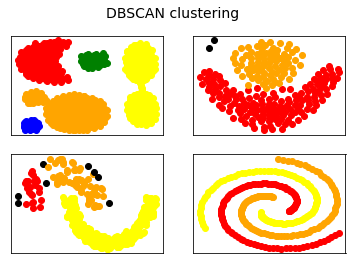

In [128]:
eps=[2,1.4,2.5,2.1]
min_samples=[10,10,7,5]
for i in range(4):
    plt.subplot(221+i)
    DBSCAN_with_plot(df[i].iloc[:,:2].values,eps[i],min_samples[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('DBSCAN clustering', fontsize=14)